# The Gibbs phenomenon

Let's load some useful packages and functions, as usual:


In [104]:
import numpy as np 
import matplotlib.pyplot as plt
from math import pi
plt.rcParams['figure.figsize'] = [15, 9]

Below, we define the function $f(x)$, as well as the expressions for the $a_n$ and $b_n$ coefficients:


In [105]:
def f(x):
     return np.sign(x)*(1-x**2)#insert the function of which you compute the Fourier Series
    
def a(n):
     return 0#insert an expression for a_n in terms of n (n>0)
    
def b(n):
    return 2*((2-2*(-1)**n)/(np.pi**3*n**3) + 1/ (np.pi*n)) #insert an expression for b_n in terms of n (n>0)

With that, we can define the truncated Fourier series $S_N(x)$:


In [106]:
def trigonometricSeriesN(x, N, a0, a, b):
    # calculate the truncated Fourier series up to (including)
    # the N-th term (cos(N*pi*x), sin(N*pi*x)) in x
    # given the Fourier coefficients a_n, b_n by the functions
    # a(n) and b(n), and a_0 by a0
    a_ = [a0] + [a(n) for n in range(1,N)]
    b_ = [0] + [b(n) for n in range(1,N)]
    sum = a_[0]
    for n in range(1,N):
        sum += a_[n]*np.cos(n*np.pi*x)+b_[n]*np.sin(n*np.pi*x)
    return sum

We finally specify the remaining data:

overshoot = 0.1789796210695156


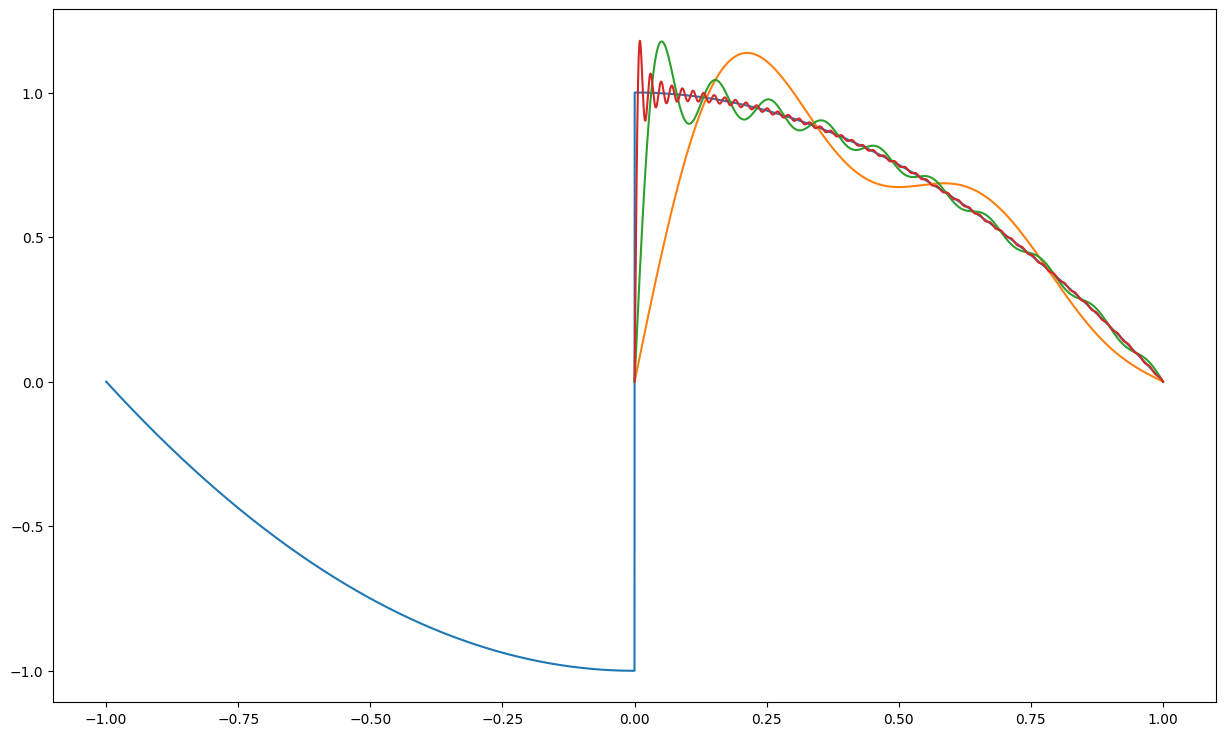

In [110]:
#Remaining problem data
a0 = 0#insert the value of the a0 coefficient
N = 1000 #truncation of series
x = np.linspace(-1,1,5000) #many equally-spaced sampling points
y = f(x) #evaluate the exact function f(x) at all points in x
# compute the truncated Fourier series and plot it and the function f in one plot
plt.plot(x,y)

#Compute error
x = np.linspace(0,1,50000) #many equally-spaced sampling points (x>=0)
y = f(x) #evaluate the exact function f(x) at all points in x
sN = trigonometricSeriesN(x, 5, a0, a, b) #evaluate the truncated trigonometric series S_N(x) at all points in x
plt.plot(x,sN)
sN = trigonometricSeriesN(x, 20, a0, a, b) #evaluate the truncated trigonometric series S_N(x) at all points in x
plt.plot(x,sN)
sN = trigonometricSeriesN(x, 100, a0, a, b) #evaluate the truncated trigonometric series S_N(x) at all points in x
plt.plot(x,sN)
sN = trigonometricSeriesN(x, 1000, a0, a, b) #evaluate the truncated trigonometric series S_N(x) at all points in x
over=max((sN - y))
print('overshoot =',over) #Compute and print the global error, based on the points in x